In [ ]:
!pip install ipython-autotime

In [1]:
%load_ext autotime

time: 456 µs (started: 2021-03-23 22:46:47 +01:00)


In [2]:
import torch         
import torchvision
import torchvision.transforms as transforms

time: 519 ms (started: 2021-03-23 22:46:48 +01:00)


### Check if GPU is present

In [3]:
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
if (torch.cuda.is_available()):
    cuda = torch.device('cuda')

time: 44.5 ms (started: 2021-03-23 22:46:49 +01:00)


In [4]:
trainset = torchvision.datasets.CIFAR10(train = True, target_transform = transforms.ToTensor(),root="cifar-10", download = True)

Files already downloaded and verified
time: 674 ms (started: 2021-03-23 22:46:50 +01:00)


In [5]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar-10
    Split: Train
    StandardTransform
Target transform: ToTensor()

time: 14.4 ms (started: 2021-03-23 22:46:52 +01:00)


In [7]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True,num_workers=2)

time: 758 µs (started: 2021-03-23 22:46:58 +01:00)


In [8]:
testset = torchvision.datasets.CIFAR10(train = False, target_transform = transforms.ToTensor(),root="cifar-10-test", download = True)

Files already downloaded and verified
time: 546 ms (started: 2021-03-23 22:46:59 +01:00)


In [9]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: cifar-10-test
    Split: Test
    StandardTransform
Target transform: ToTensor()

time: 1.28 ms (started: 2021-03-23 22:46:59 +01:00)


In [10]:
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

time: 851 µs (started: 2021-03-23 22:47:02 +01:00)


In [11]:
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

time: 610 µs (started: 2021-03-23 22:47:03 +01:00)


In [12]:
torch.cuda.current_device()

0

time: 3.76 ms (started: 2021-03-23 22:47:45 +01:00)


In [14]:
torch.cuda.get_device_name(0)

'GeForce GTX 1060 6GB'

time: 2.5 ms (started: 2021-03-23 22:48:12 +01:00)


In [15]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
time: 1.16 s (started: 2021-03-23 22:48:15 +01:00)


### Preview CIFAR-10 dataset images

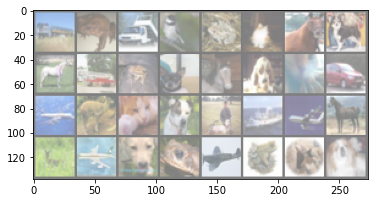

truck  frog truck  bird  frog   cat horse   dog horse truck  frog   dog horse   dog   cat   car plane  deer   cat   dog  deer  ship plane horse  deer plane   dog  frog plane  frog   cat   dog
time: 356 ms (started: 2021-03-23 22:48:37 +01:00)


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
print(dataiter)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

## Check if GPU is present - if yes computer on GPU else on CPU

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

time: 3.52 ms (started: 2021-03-23 22:48:43 +01:00)


### Setting up the layers of Convolutional neural network

In [18]:
import torch.nn as nn

time: 530 µs (started: 2021-03-23 22:48:46 +01:00)


In [19]:
in_size = 3                 # number of channel in the input image
 
hid1_size = 64              # no of output channel from first CNN layer

hid2_size = 128              # no of output channel from second CNN layer

hid3_size = 256

hid4_size = 512

out_size = len(labels)      # no of categories in the dataset
#set_trace()
k_conv_size = 3             # 3x3 convolutional kernel
conv_stride = 1
conv_pad = 1

time: 1.05 ms (started: 2021-03-23 22:48:48 +01:00)


In [20]:
class VGG_11(nn.Module):
    
    def __init__(self):
        super(VGG_11,self).__init__()
        
        self.convLayer = nn.Sequential(
            nn.Conv2d(3, 64, k_conv_size, stride=conv_stride, padding=conv_pad),    # conv layer
            nn.BatchNorm2d(64),
            #nn.LocalResponseNorm(64),
            nn.ReLU(),                              # Activation layer
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(64,128,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(128,256,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256,256,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(256,512,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512,512,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(512,512,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512,512,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )  # Pooling layer with kernel size 2x2
        
        #self.layer2 = nn.Sequential()
        
        #self.layer3 = nn.Sequential()
        
        #self.layer4 = nn.Sequential()
        
        #self.layer5 = nn.Sequential()
        
        #self.layer6 = nn.Sequential()

        #self.layer7 = nn.Sequential()

        #self.layer8 = nn.Sequential()      
        
        self.fullyConnLayer = nn.Sequential(
        nn.Linear(512, 4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096,4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096,out_size)
        )
            
        #self.fullyConnected1= nn.Linear(512, 512)      # Fully connected layer
        
        #self.fullyConnected2= nn.Linear(512, 512)         # Fully connected layer
        
        #self.fullyConnected3= nn.Linear(512, 10)           # Fully connected layer
            
        
    def forward(self,x):
            #out = self.layer1(x)
            
            out = self.convLayer(x)
            
            out = out.reshape(out.size(0), -1)
            
            out = self.fullyConnLayer(out)
            
            #m = nn.Dropout(p=0.5)
            #out = m(nn.functional.relu(self.fullyConnected1(out)))
            
            #out = m(nn.functional.relu(self.fullyConnected2(out)))
            
            #out = m(nn.functional.relu(self.fullyConnected3(out)))
            
            #print(out.shape)
            
            return out 
        
vgg_11 = VGG_11()

time: 151 ms (started: 2021-03-23 22:48:51 +01:00)


## Define a Loss function and optimizer

In [21]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(vgg_11.parameters())

time: 1.59 ms (started: 2021-03-23 22:48:53 +01:00)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

## Train the network

In [33]:
for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #print('i ',i)
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #print('labels ', labels)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        #device = 'cuda' if torch.cuda.is_available() else 'cpu'
        #model = vgg_11(testloader).to(device)
        outputs = vgg_11(inputs)
        
        #optimizer.no_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 1.610
[1,   400] loss: 1.542
[1,   600] loss: 1.485
[1,   800] loss: 1.437
[1,  1000] loss: 1.407
[1,  1200] loss: 1.336
[1,  1400] loss: 1.307
[2,   200] loss: 1.204
[2,   400] loss: 1.202
[2,   600] loss: 1.111
[2,   800] loss: 1.131
[2,  1000] loss: 1.145
[2,  1200] loss: 1.064
[2,  1400] loss: 1.065
[3,   200] loss: 0.992
[3,   400] loss: 1.006
[3,   600] loss: 0.979
[3,   800] loss: 0.948
[3,  1000] loss: 0.947
[3,  1200] loss: 0.924
[3,  1400] loss: 0.916
[4,   200] loss: 0.845
[4,   400] loss: 0.839
[4,   600] loss: 0.849
[4,   800] loss: 0.833
[4,  1000] loss: 0.801
[4,  1200] loss: 0.824
[4,  1400] loss: 0.804
[5,   200] loss: 0.731
[5,   400] loss: 0.733
[5,   600] loss: 0.759
[5,   800] loss: 0.748
[5,  1000] loss: 0.723
[5,  1200] loss: 0.750
[5,  1400] loss: 0.729
[6,   200] loss: 0.633
[6,   400] loss: 0.659
[6,   600] loss: 0.645
[6,   800] loss: 0.668
[6,  1000] loss: 0.664
[6,  1200] loss: 0.663
[6,  1400] loss: 0.648
[7,   200] loss: 0.564
[7,   400] 

### Save the trained model

In [34]:
PATH = './cifar_vgg11_4_with_batchNorm__no_softmax_25ep_GPU.pth'
torch.save(vgg_11.state_dict(), PATH)

time: 133 ms (started: 2021-03-24 08:12:34 +01:00)


## Test the network on the test data

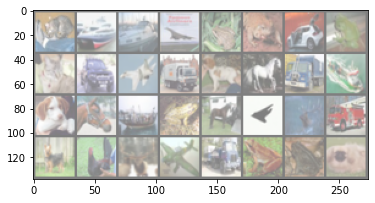

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog
time: 208 ms (started: 2021-03-24 08:12:36 +01:00)


In [35]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(32)))

In [36]:
outputs = vgg_11(images)

time: 163 ms (started: 2021-03-24 08:12:37 +01:00)


In [37]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(32)))

Predicted:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog   dog  ship  frog horse plane  deer truck  deer  bird   dog plane truck  frog  frog   dog
time: 2.27 ms (started: 2021-03-24 08:12:39 +01:00)


### Accuracy on whole test-dataset

In [38]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = vgg_11(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 80 %
time: 27.3 s (started: 2021-03-24 08:12:45 +01:00)


### Which classes perform well and which classes did not?

In [39]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = vgg_11(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 84 %
Accuracy of   car : 87 %
Accuracy of  bird : 68 %
Accuracy of   cat : 44 %
Accuracy of  deer : 77 %
Accuracy of   dog : 86 %
Accuracy of  frog : 92 %
Accuracy of horse : 84 %
Accuracy of  ship : 90 %
Accuracy of truck : 91 %
time: 37.2 s (started: 2021-03-24 08:15:53 +01:00)


### Test the default CUDA device

In [40]:
torch.cuda.current_device()

0

time: 3.66 ms (started: 2021-03-24 08:17:05 +01:00)


In [41]:
torch.cuda.get_device_name(0)

'GeForce GTX 1060 6GB'

time: 3.08 ms (started: 2021-03-24 08:17:06 +01:00)


# End

## Test code

In [ ]:
if __name__ == '__main__':
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    #model = vgg_11(testloader).to(device)
    for data in testloader:
        images, labels = data
        model = vgg_11(images)
        print(model)

## Define a Convolutional Neural Network - Approach 2

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

in_size = 3                 # number of channel in the input image
 
hid1_size = 64              # no of output channel from first CNN layer

hid2_size = 128              # no of output channel from second CNN layer

out_size = len(labels)      # no of categories in the dataset

k_conv_size = 3             # 3x3 convolutional kernel

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()